In [1]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
data = load_iris() # データをロード
X = data.data      # 特徴量
y = data.target    # ラベル

In [3]:
ss = ShuffleSplit(n_splits=1,      # 分割を1個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

In [4]:
clf = linear_model.LogisticRegression() # 識別器を作成

In [5]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

In [6]:
clf.fit(X_train, y_train); # 識別器の学習

In [7]:
print(clf.score(X_train, y_train)) # 学習データの精度

0.92


In [8]:
print(clf.score(X_test, y_test)) # テストデータの精度

0.84


In [9]:
ss = ShuffleSplit(n_splits=10,     # 分割を10個生成
                  train_size=0.5,  # 学習は半分
                  test_size =0.5,  # テストも半分
                  random_state=0)  # 乱数種（再現用）

scores = []
for train_index, test_index in ss.split(X): # 学習データとテストデータのインデックスを作成
    
    X_train, X_test = X[train_index], X[test_index] # 学習データ，テストデータ
    y_train, y_test = y[train_index], y[test_index] # 学習データのラベル，テストデータのラベル

    clf.fit(X_train, y_train)         # 識別器の学習
    score = clf.score(X_test, y_test) # テストデータの精度
    scores.append(score)

scores = np.array(scores)
print(scores)

[ 0.84        0.93333333  0.90666667  1.          0.90666667  0.93333333
  0.94666667  1.          0.90666667  0.88      ]


In [10]:
scores.mean()

0.92533333333333334

In [11]:
scores.std()

0.047027178902795737

In [12]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9253333333333333 +/- 0.04702717890279574


In [13]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

92.53 +/- 4.70 %


In [14]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# 学習データの分量を0.1, 0.2, ..., 0.9に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [16]:
all_mean = []
all_std  = []

for train_size in train_sizes:

    ss = ShuffleSplit(n_splits=100,
                      train_size=train_size,
                      test_size=1-train_size)

    scores = []
    for train_index, test_index in ss.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores.append(score)

    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size    * 100, 
                                                                scores.mean() * 100, 
                                                                scores.std()  * 100))
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

train_size 10%: 76.86 +/- 11.14 %
train_size 20%: 83.62 +/- 9.70 %
train_size 30%: 88.34 +/- 8.37 %
train_size 40%: 92.32 +/- 4.81 %
train_size 50%: 92.79 +/- 4.52 %
train_size 60%: 94.03 +/- 3.73 %
train_size 70%: 95.29 +/- 3.19 %
train_size 80%: 95.70 +/- 4.30 %
train_size 90%: 95.87 +/- 5.23 %


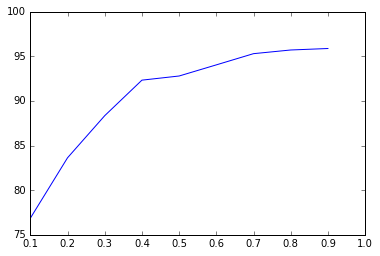

In [17]:
plt.plot(train_sizes, all_mean)

(0, 1)

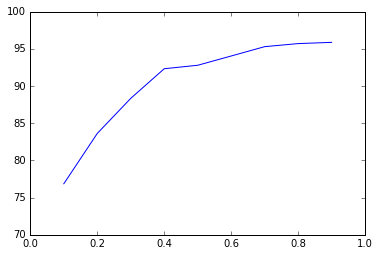

In [18]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)

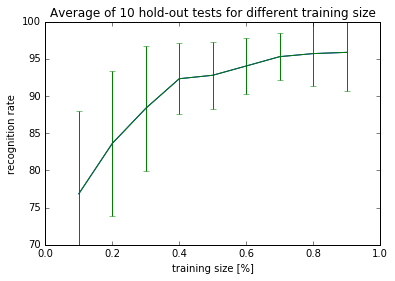

In [19]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")